# HW 1 Data Visualization

### Import Libraries

In [ ]:
import math # for math.nan and math.isnan
import pandas as pd # data frames
import matplotlib.pyplot as plt # plotting
from datetime import datetime # manipulate date strings

### 1. Load Data

In [ ]:
# load covid19cases_test.csv
df = pd.read_csv("covid19cases_test.csv")
df.info()
print()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43920 entries, 0 to 43919
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   date                        43859 non-null  object 
 1   area                        43920 non-null  object 
 2   area_type                   43920 non-null  object 
 3   population                  42480 non-null  float64
 4   cases                       43200 non-null  float64
 5   cumulative_cases            43200 non-null  float64
 6   deaths                      43200 non-null  float64
 7   cumulative_deaths           43200 non-null  float64
 8   total_tests                 43859 non-null  float64
 9   cumulative_total_tests      43920 non-null  int64  
 10  positive_tests              43859 non-null  float64
 11  cumulative_positive_tests   43920 non-null  int64  
 12  reported_cases              43200 non-null  float64
 13  cumulative_reported_cases   432

,date,area,area_type,population,cases,cumulative_cases,deaths,cumulative_deaths,total_tests,cumulative_total_tests,positive_tests,cumulative_positive_tests,reported_cases,cumulative_reported_cases,reported_deaths,cumulative_reported_deaths,reported_tests
0,2020-02-01,Alameda,County,1685886.0,3.0,3.0,0.0,0.0,4.0,4,0.0,0,0.0,0.0,0.0,0.0,NaN
1,2020-02-02,Alameda,County,1685886.0,0.0,3.0,0.0,0.0,1.0,5,0.0,0,0.0,0.0,0.0,0.0,NaN
2,2020-02-03,Alameda,County,1685886.0,0.0,3.0,0.0,0.0,0.0,5,0.0,0,0.0,0.0,0.0,0.0,NaN
3,2020-02-04,Alameda,County,1685886.0,0.0,3.0,0.0,0.0,0.0,5,0.0,0,0.0,0.0,0.0,0.0,NaN
4,2020-02-05,Alameda,County,1685886.0,0.0,3.0,0.0,0.0,1.0,6,0.0,0,0.0,0.0,0.0,0.0,NaN


### 2. Create a date_offset column

In [ ]:
# How many counties are monitored
# print(f"There are {len(df['area'].unique())} different counties")

# How many missing dates
# print(f"There are {df['date'].isnull().sum()} missing dates")
# Since there is the same amount of counties as missing dates.
# Could be that they are the same dates

# Create Date Offeset Column
df["date_offset"] = math.nan



for index, value in enumerate(df["date"]):
     if index == 0:
         date_init = datetime.strptime(value, '%Y-%m-%d').date()
    #  print(index, value)
     if type(value) == str:
        date = datetime.strptime(value, '%Y-%m-%d').date()
        df.loc[index, "date_offset"] = (date - date_init).days


print(df["date_offset"].head())



0    0.0
1    1.0
2    2.0
3    3.0
4    4.0
Name: date_offset, dtype: float64


### 3. Normalize Case Counts

In [ ]:
# new "normalized_cases" column
# divide value in "cases" column by value of "population" column

df["normalized_cases"] = df.apply(lambda row: row['cases'] / row['population'], axis=1)

print(df["normalized_cases"].head())


0    0.000002
1    0.000000
2    0.000000
3    0.000000
4    0.000000
Name: normalized_cases, dtype: float64


### 4. Quick Plot of One County

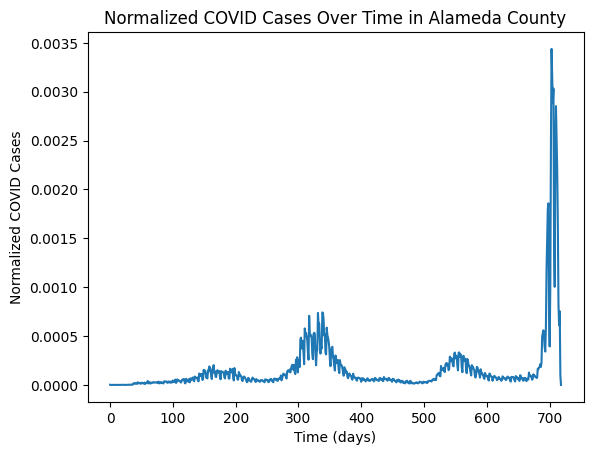

In [ ]:
# subset one county
# Alameda County
df_alameda = df[df["area"] == "Alameda"]

# plot
fig, axes = plt.subplots()
axes.plot(df_alameda['date_offset'], df_alameda['normalized_cases'])
plt.title("Normalized COVID Cases Over Time in Alameda County")
plt.xlabel("Time (days)")
plt.ylabel("Normalized COVID Cases")
plt.show()

### 5. Statistcal Summaries

In [ ]:
# median and IQR
df_safe_cols = df.drop(columns=['date', 'area', 'area_type'])

df_medians = df_safe_cols.groupby(['date_offset']).median().reset_index()

df_iqr_1 = df_safe_cols.groupby(['date_offset']).quantile(0.25).reset_index()

df_iqr_3 = df_safe_cols.groupby(['date_offset']).quantile(0.75).reset_index()


print("Median:")
print(df_medians["normalized_cases"].tail())
print()
print("IQR (1st Quartile):")
print(df_iqr_1["normalized_cases"].tail())
print()
print("IQR (3rd Quartile):")
print(df_iqr_3["normalized_cases"].tail())

Median:
714    0.000545
715    0.000331
716    0.000514
717    0.000115
718    0.000000
Name: normalized_cases, dtype: float64

IQR (1st Quartile):
714    0.000306
715    0.000222
716    0.000275
717    0.000086
718    0.000000
Name: normalized_cases, dtype: float64

IQR (3rd Quartile):
714    0.000789
715    0.000483
716    0.000740
717    0.000238
718    0.000000
Name: normalized_cases, dtype: float64


### 6. Running Average

In [ ]:
# Weekly runnering average
# median and iqr

df_medians_roll = df_medians.rolling(7).mean()

df_iqr_1_roll = df_iqr_1.rolling(7).mean()

df_iqr_3_roll = df_iqr_3.rolling(7).mean()

### 7. Final Plot

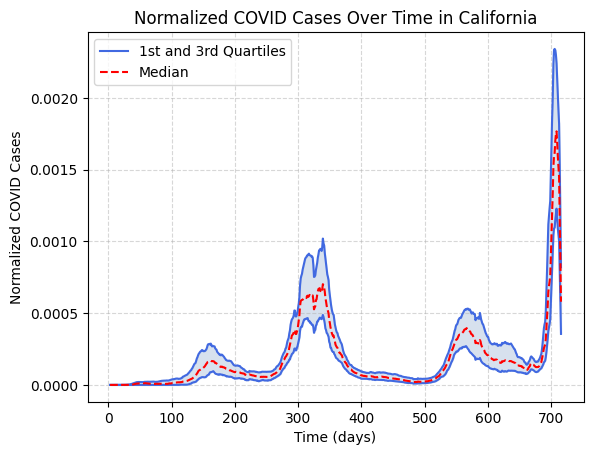

In [ ]:
# final plot
fig, axes = plt.subplots()

axes.plot(df_iqr_3_roll['date_offset'], df_iqr_3_roll['normalized_cases'],
          c = "royalblue")

axes.plot(df_iqr_1_roll['date_offset'], df_iqr_1_roll['normalized_cases'],
          c = "royalblue", label="_nolegend_")

plt.fill_between(df_iqr_1_roll['date_offset'], df_iqr_1_roll['normalized_cases'], df_iqr_3_roll['normalized_cases'],
                 color='lightsteelblue', alpha=0.5, label="_nolegend_")

axes.plot(df_medians_roll['date_offset'], df_medians_roll['normalized_cases'],
         c = "red", linestyle = "--")

plt.grid(alpha=0.5, linestyle='--')

plt.title("Normalized COVID Cases Over Time in California")
plt.xlabel("Time (days)")
plt.ylabel("Normalized COVID Cases")

plt.legend(labels = ["1st and 3rd Quartiles", "Median"],
           fontsize='medium', fancybox=True)

plt.show()
